In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as s
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
data.drop(labels=data.columns[-1],axis=1,inplace=True)

In [8]:
data.drop(labels="id",axis=1,inplace=True)

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
data["diagnosis"].replace(to_replace=["B","M"],value=[0,1],inplace=True)

C:\Users\vanda\AppData\Local\Temp\ipykernel_15960\2662740462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace(to_replace=["B","M"],value=[0,1],inplace=True)
C:\Users\vanda\AppData\Local\Temp\ipykernel_15960\2662740462.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [13]:
data["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [14]:
training_data_len = int(0.7*data.shape[0])
testing_data_len = int(0.3*data.shape[0])

In [16]:
training_data_len

398

In [17]:
benign_class_data = data[data["diagnosis"] == 0]
malignant_class_data = data[data["diagnosis"] == 1]

In [18]:
benign_class_data.shape

(357, 31)

In [19]:
benign_class_training_data = benign_class_data.iloc[0:training_data_len//2]
benign_class_testing_data = benign_class_data.iloc[training_data_len //2:]

In [20]:
benign_class_testing_data.shape

(158, 31)

In [21]:
malignant_class_training_data = malignant_class_data.iloc[0:training_data_len//2]
malignant_class_testing_data = malignant_class_data.iloc[training_data_len //2:]

In [22]:
malignant_class_training_data.shape

(199, 31)

In [23]:
training_data = pd.concat([benign_class_training_data,
                           malignant_class_training_data],axis=0)

testing_data = pd.concat([benign_class_testing_data,
                           malignant_class_testing_data],axis=0)

In [24]:
training_data.shape

(398, 31)

In [26]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [31]:
benign_class_mean_vector = np.array(benign_class_training_data.iloc[:,1:].mean())
benign_class_cov = np.array(benign_class_training_data.iloc[:,1:].cov())

malignant_class_mean_vector = np.array(benign_class_training_data.iloc[:,1:].mean())
malignant_class_cov = np.array(benign_class_training_data.iloc[:,1:].cov())

In [32]:
np.linalg.det(benign_class_cov)


1.3582567523044202e-76

In [33]:
np.linalg.det(malignant_class_cov)

1.3582567523044202e-76

In [34]:
data_corr = data.corr()

In [35]:
data_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

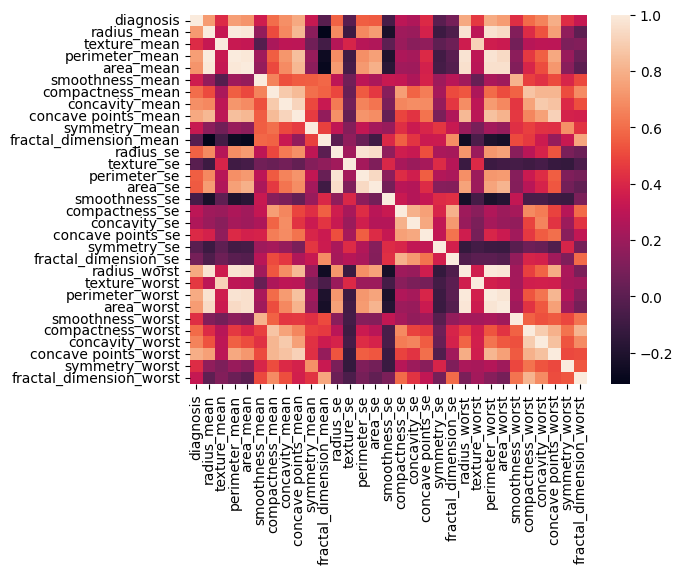

In [36]:
sns.heatmap(data_corr,xticklabels = True,yticklabels=True)

In [37]:
idx = np.argwhere((data_corr.loc["diagnosis"] <= -0.5) | (data_corr.loc["diagnosis"] >= 0.5))

In [38]:
idx

array([[ 0],
       [ 1],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 8],
       [11],
       [13],
       [14],
       [21],
       [23],
       [24],
       [26],
       [27],
       [28]], dtype=int64)

In [39]:
idx.shape

(16, 1)

In [41]:
data_corr.index[idx[:,0]]

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [42]:
filtered_data = data[data_corr.index[idx[:,0]]]

In [43]:
filtered_data.shape

(569, 16)

In [44]:
filtered_data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [45]:
data_input_features_corr = filtered_data.iloc[:,1:].corr()

<Axes: >

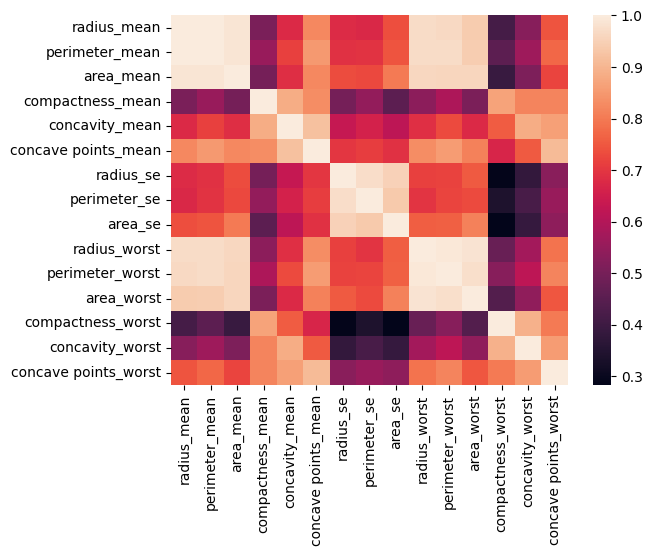

In [46]:
sns.heatmap(data_input_features_corr,xticklabels=True,yticklabels=True)

In [47]:
low_correlated_input_features = list(filtered_data.columns[7:10])
low_correlated_input_features.append("compactness_worst")


In [48]:
low_correlated_input_features

['radius_se', 'perimeter_se', 'area_se', 'compactness_worst']

In [51]:
filtered_data = pd.concat([filtered_data[low_correlated_input_features],
                           filtered_data["diagnosis"]],axis = 1)

In [52]:
filtered_data.head()

,radius_se,perimeter_se,area_se,compactness_worst,diagnosis
0,1.0950,8.589,153.40,0.6656,1
1,0.5435,3.398,74.08,0.1866,1
2,0.7456,4.585,94.03,0.4245,1
3,0.4956,3.445,27.23,0.8663,1
4,0.7572,5.438,94.44,0.2050,1


In [53]:
filtered_data.shape

(569, 5)

In [54]:
benign_class_data = filtered_data[filtered_data["diagnosis"] ==0]
malignant_class_data = filtered_data[filtered_data["diagnosis"] ==1]

In [55]:
benign_class_training_data = benign_class_data.iloc[0:training_data_len//2]
benign_class_testing_data = benign_class_data.iloc[training_data_len//2:]

In [56]:
malignant_class_training_data = benign_class_data.iloc[0:training_data_len//2]
malignant_class_testing_data = benign_class_data.iloc[training_data_len//2:]

In [58]:
training_data = pd.concat([benign_class_training_data,
                           malignant_class_training_data],axis=0)

testing_data = pd.concat([benign_class_testing_data,
                          malignant_class_testing_data],axis=0)

In [59]:
benign_class_mean_vector = benign_class_training_data.iloc[:,0:4].mean()

In [60]:
benign_class_cov = benign_class_training_data.iloc[:,0:4].cov()

malignant_class_mean_vector = benign_class_training_data.iloc[:,0:4].mean()
malignant_class_cov = benign_class_training_data.iloc[:,0:4].cov()

In [63]:
benign_likelihood = s.multivariate_normal.pdf(x=training_data.iloc[:,0:4],
                                              mean=benign_class_mean_vector,
                                              cov=benign_class_cov)

malignant_likelihood = s.multivariate_normal.pdf(x=training_data.iloc[:,0:4],
                                                 mean=malignant_class_mean_vector,
                                                 cov=malignant_class_cov)

y_train_pred = (malignant_likelihood > benign_likelihood)


In [64]:
y_train_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,